In [1]:
import deps
from pextant.lib.geoshapely import GeoPoint, \
LAT_LONG, LONG_LAT, UTM, Cartesian, Cartesian2

## 1. Abstraction for Earth surface geometry
SEXTANT uses objects - whose names are prefixed by *Geo* - to represent geometrical objects that are defined on a map. The objects are built on top of the python library shapely, that is standard for generic geometry not attached to a map representation. Here we address the gap by providing a very basic abstraction that makes it easy to convert between different Earth based reference systems.

### 1.1 GeoPoint
GeoPoints take a coordinate system, and then two coordinates(currently not extended to 3D). The coordinate systems predefined are as follows:

- Latitude, longitude (LAT_LONG), or inversly longitude, latitude (LONG_LAT)
- UTM(Universal Transverse Mercator). These are locally projected cartesian grids that depend on which longitude you are at(defining a zone), and therefore take as an argument the zone number. Of the UTM grid. Optionally, it can also take a previously defined point as an argument to automatically determine the UTM zone.
- Cartesian(point, resolution). This creates a 2D cartesian coordinate system centered at a point, with grid spacing set by the resolution. Coordinates here represent cells, and are therfore integer
- Cartesian2(point, resolution). Same as Cartesian, but continous. Should find a better name

#### Latitude, longitude

In [2]:
geopoint = GeoPoint(LAT_LONG, 47.9941214, 7.8509671)

These can next be converted to other coordinate systems; the output are the coordinates(and not a new object) - this might be a good upgrade to add.
One caviat, if we convert to UTM of any other zone, it will still force the conversion to UTM of the zone that the point is in.

In [3]:
geopoint.to(UTM(5)) #Any number instead of 5 will give same result

array([  414278.16731025,  5316285.59492359])

#### Cartesian

In [4]:
ref_frame = Cartesian(geopoint, resolution=1)

In [5]:
geopoint.to(ref_frame)

array([0, 0])

In [6]:
point_in_ref = GeoPoint(ref_frame, 20, 10)
point_lat_long = point_in_ref.to(LAT_LONG)

And converting back

In [7]:
GeoPoint(LAT_LONG, *point_lat_long).to(ref_frame) # notice that the * symbol was used, this automatically splits the array into two arguments

array([20, 10])

### 1.2 GeoPolygon
A collection(list) of several GeoPoints are defined as a GeoPolygon

In [8]:
from pextant.lib.geoshapely import GeoPolygon

In [9]:
geopolygon = GeoPolygon([geopoint, point_in_ref])

Since the library is built on top of shapely, we can also visualize the shapes natively in the notebook

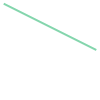

In [10]:
geopolygon

We can also define a polygon through arrays of coordinates in a coordinate system, in a similar way we defined the GeoPoint

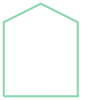

In [11]:
house = GeoPolygon(ref_frame, [0,0,10,20,20,0], [30,10,5,10,30,30])
house

And easily convert to other systems in the same way that was done with GeoPoint

In [12]:
house.to(LAT_LONG)

array([[ 47.99385154,  47.99403145,  47.99407776,  47.99403413,
         47.99385422,  47.99385154],
       [  7.85097309,   7.8509691 ,   7.85110211,   7.85123713,
          7.85124112,   7.85097309]])

One can access elements of the list through regular indexing:

In [13]:
print(house[3].to(LAT_LONG))
house[3].to(LAT_LONG) == house.to(LAT_LONG).T[3]

[ 47.99403413   7.85123713]


array([ True,  True], dtype=bool)

### Helper functions
Geo shapely is built on top of shapely, where the underlying representation uses the UTM coordinates. This could result in small numerical inaccuracies due to the fact that UTM coordinates can be numbers on the order of a hundred thousands or a million. The nice thing is that we can use it in the same way you would use a shapely object:

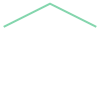

In [14]:
geopolygon.envelope.intersection(house)

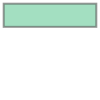

In [15]:
geopolygon.envelope.intersection(house.envelope)

### 1.3 GeoEnvelope
Although shapely offers the envelope function to get the envelope of a polygon, an very light object was developped in addition for specific use cases where it was useful. This representation makes it easy to add a buffer to the envelope by calling addMargin(scale, length), and has a convenient function to get the upper left and lower right coordinate of the envelope. The envelope is defined through the upper left and lower right corner, but all GeoPolygon objects have the built in function geoEnvelope() to get the envelope.

In [16]:
from pextant.lib.geoshapely import GeoEnvelope

In [17]:
geoenvelope = GeoEnvelope(house[0], house[3]).addMargin(5, 5)

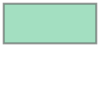

In [18]:
geoenvelope.envelope

In [19]:
house_upper_left, house_lower_right = house.geoEnvelope().getBounds()

In [20]:
house_upper_left.to(ref_frame)

array([0, 5])

In [21]:
house_lower_right.to(ref_frame)

array([20, 30])